<a href="https://colab.research.google.com/github/Stephen0111/Fraud_detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ----------------------------------------
# Notebook Setup: Import Required Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For visualization styling
sns.set(style="whitegrid")
%matplotlib inline

# For warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# ===============================
# Step 1: Load Dataset
# ===============================
import kagglehub
import pandas as pd
import os

# Download/cache dataset
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")
print("Dataset path:", path)

# List files to see what's available
print("\nAvailable files:")
for file in os.listdir(path):
    print(file)

# Read the actual CSV file
df = pd.read_csv(f"{path}/bank_transactions_data_2.csv")
df.head()

Using Colab cache for faster access to the 'bank-transaction-dataset-for-fraud-detection' dataset.
Dataset path: /kaggle/input/bank-transaction-dataset-for-fraud-detection

Available files:
bank_transactions_data_2.csv


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
# ----------------------------------------
# Dataset Information
# ----------------------------------------
# Shape of dataset
print("Dataset Shape:", df.shape)

# Column information and datatypes
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
df.describe(include='all')


Dataset Shape: (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [6]:
# ----------------------------------------
# Data Cleaning
# ----------------------------------------
# Convert date columns to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Optional: Handle missing values (example: fill numeric columns with median)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Preview cleaned data
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


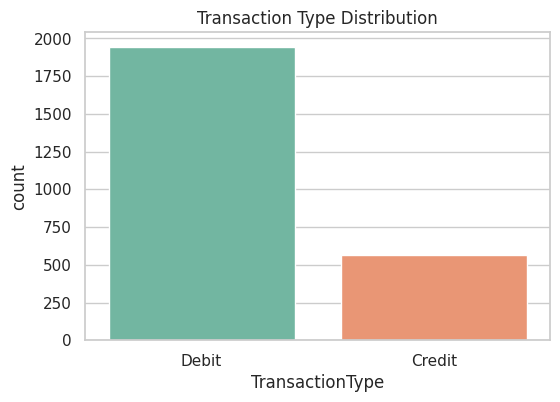

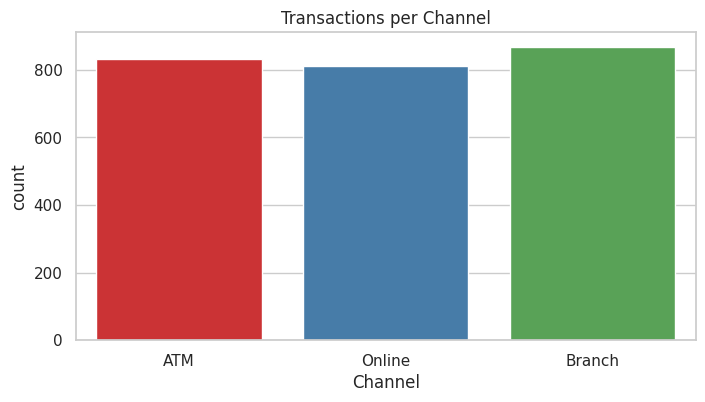

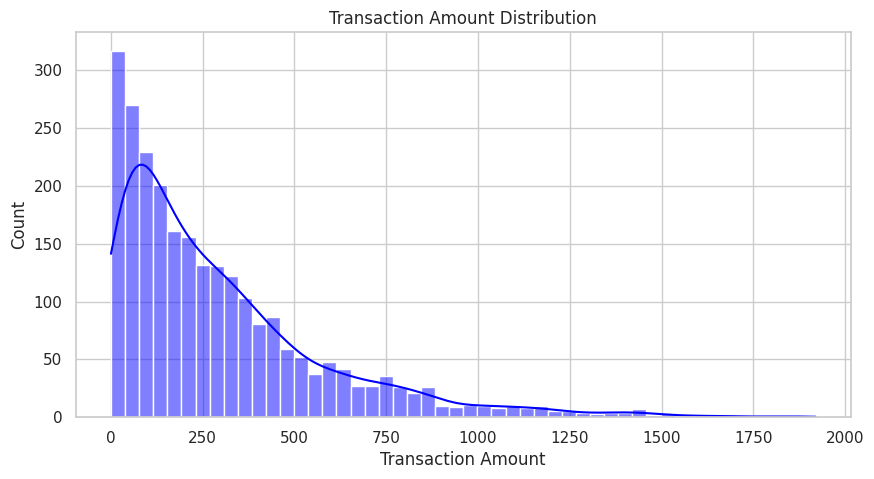

In [7]:
# ----------------------------------------
# Exploratory Data Analysis (EDA)
# ----------------------------------------
# Transaction type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TransactionType', palette='Set2')
plt.title("Transaction Type Distribution")
plt.show()

# Transactions per channel
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Channel', palette='Set1')
plt.title("Transactions per Channel")
plt.show()

# Transaction amount distribution
plt.figure(figsize=(10,5))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.show()


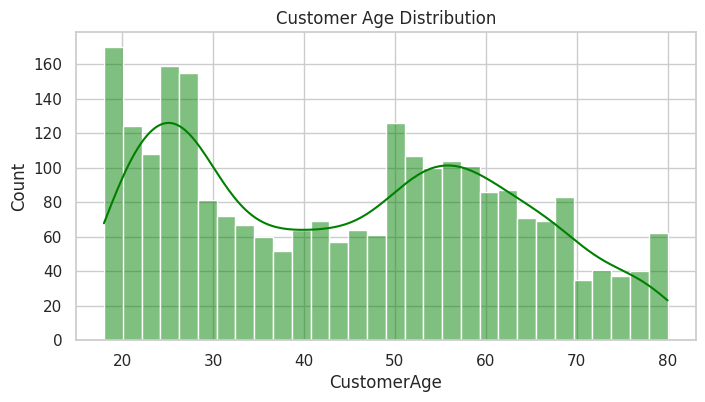

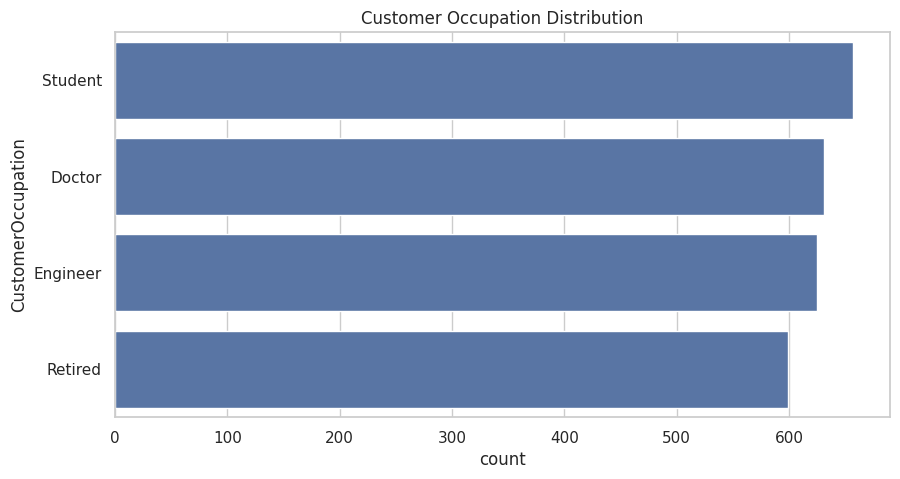

In [8]:
# ----------------------------------------
# Customer Age and Occupation Analysis
# ----------------------------------------
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['CustomerAge'], bins=30, kde=True, color='green')
plt.title("Customer Age Distribution")
plt.show()

# Occupation distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='CustomerOccupation', order=df['CustomerOccupation'].value_counts().index)
plt.title("Customer Occupation Distribution")
plt.show()


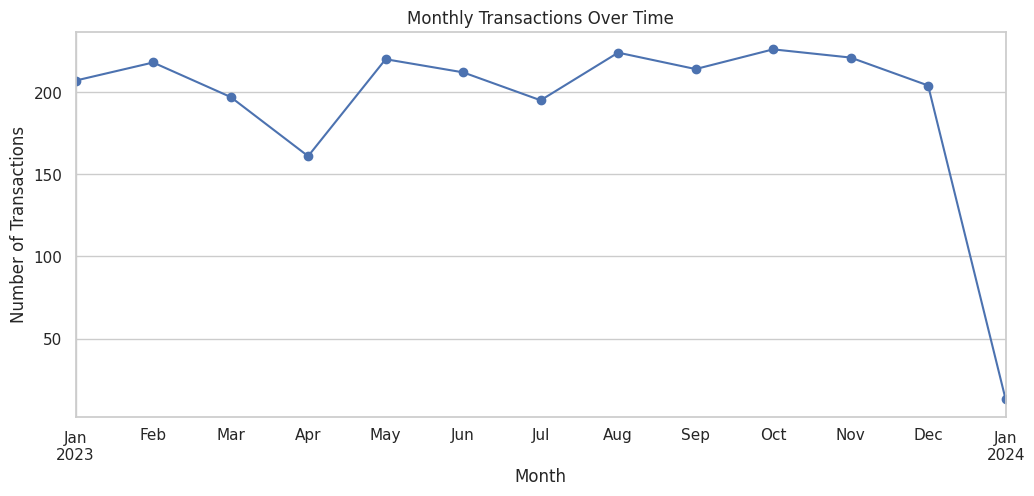

In [9]:
# ----------------------------------------
# Time-Based Analysis
# ----------------------------------------
# Transactions over time
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
monthly_transactions = df.groupby('TransactionMonth').size()

plt.figure(figsize=(12,5))
monthly_transactions.plot(marker='o')
plt.title("Monthly Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()


In [10]:
# ----------------------------------------
# Feature Engineering
# ----------------------------------------
# Transaction frequency per account
df['TransactionCountPerAccount'] = df.groupby('AccountID')['TransactionID'].transform('count')

# Transaction amount relative to account balance
df['AmountOverBalance'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)  # avoid division by zero

# Time since last transaction
df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days
df['DaysSinceLastTransaction'] = df['DaysSinceLastTransaction'].fillna(0)

df[['TransactionCountPerAccount','AmountOverBalance','DaysSinceLastTransaction']].head()


,TransactionCountPerAccount,AmountOverBalance,DaysSinceLastTransaction
0,7,0.002756,-573
1,7,0.027343,-496
2,4,0.112423,-483
3,8,0.021528,-549
4,6,0.001810,-385


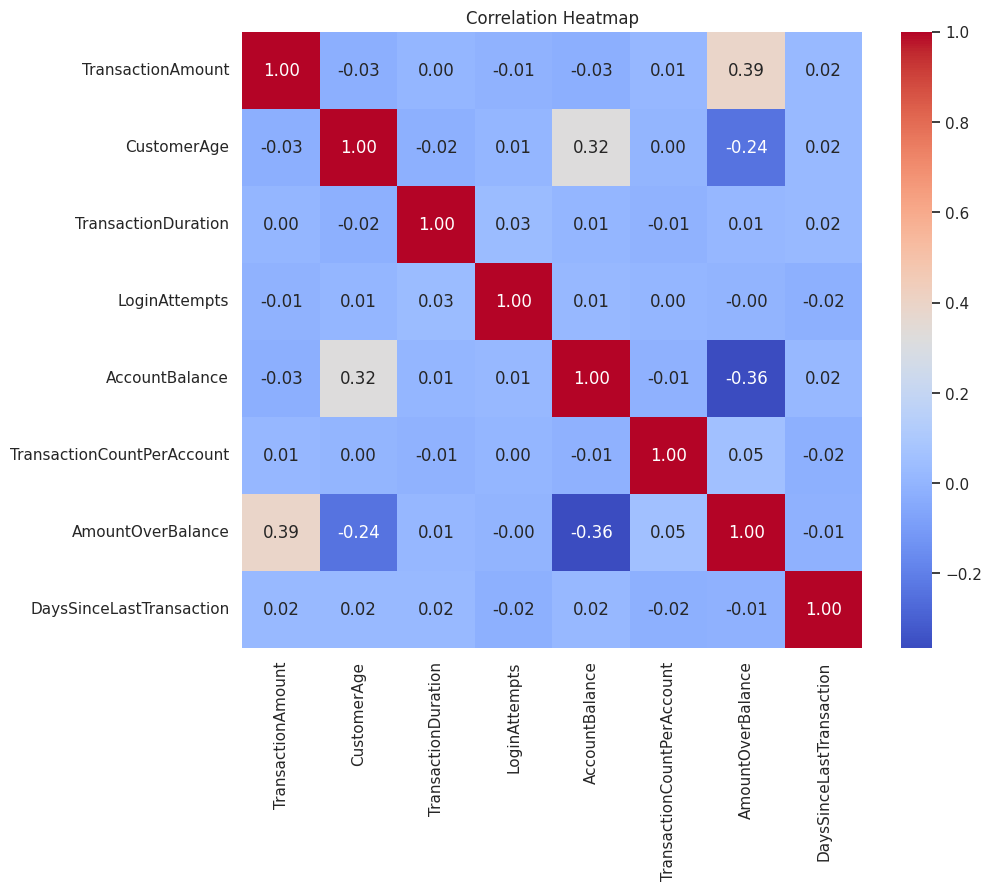

In [11]:
# ----------------------------------------
# Correlation Heatmap
# ----------------------------------------
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Saved plot: categorical_counts.png
Saved plot: avg_amount_by_channel.png


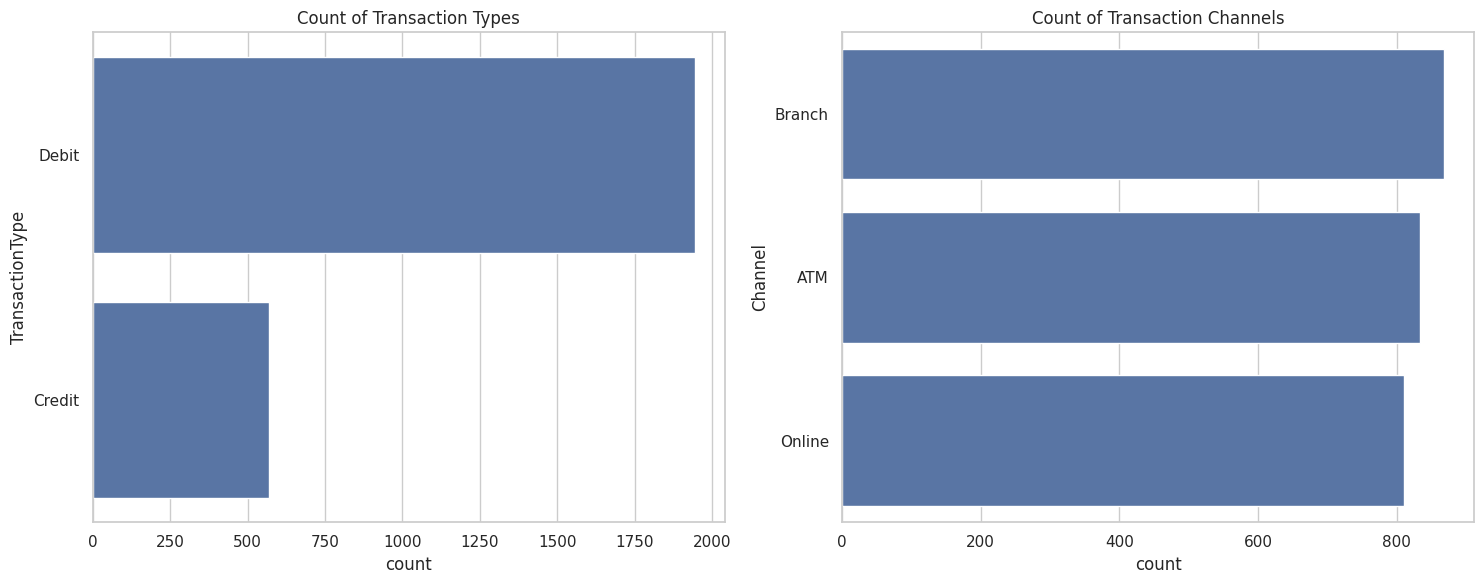

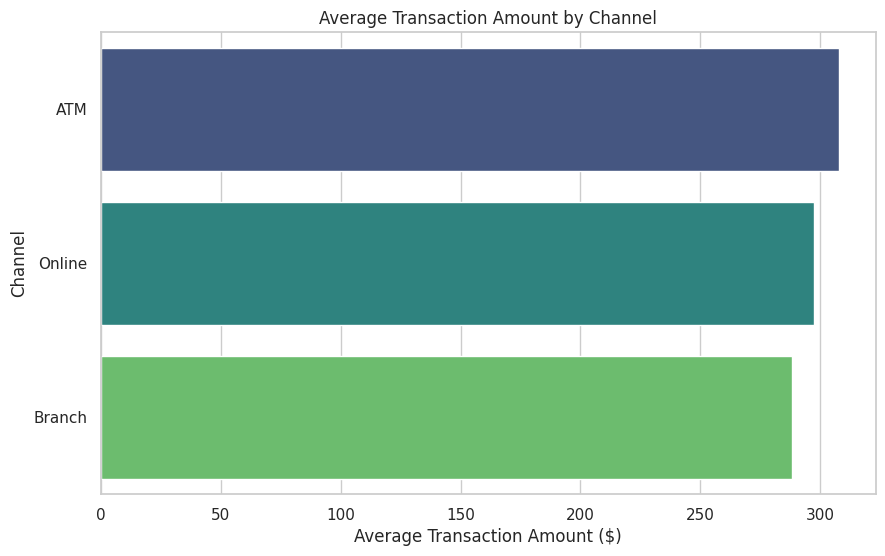

In [14]:
## 1. Transaction Type and Channel Counts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(y='TransactionType', data=df, ax=axes[0], order=df['TransactionType'].value_counts().index)
axes[0].set_title('Count of Transaction Types')

sns.countplot(y='Channel', data=df, ax=axes[1], order=df['Channel'].value_counts().index)
axes[1].set_title('Count of Transaction Channels')

plt.tight_layout()
plt.savefig('categorical_counts.png')
print("Saved plot: categorical_counts.png")

## 2. Average Transaction Amount by Channel
avg_amount_by_channel = df.groupby('Channel')['TransactionAmount'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionAmount', y='Channel', data=avg_amount_by_channel, palette='viridis')
plt.title('Average Transaction Amount by Channel')
plt.xlabel('Average Transaction Amount ($)')
plt.ylabel('Channel')
plt.savefig('avg_amount_by_channel.png')
print("Saved plot: avg_amount_by_channel.png")

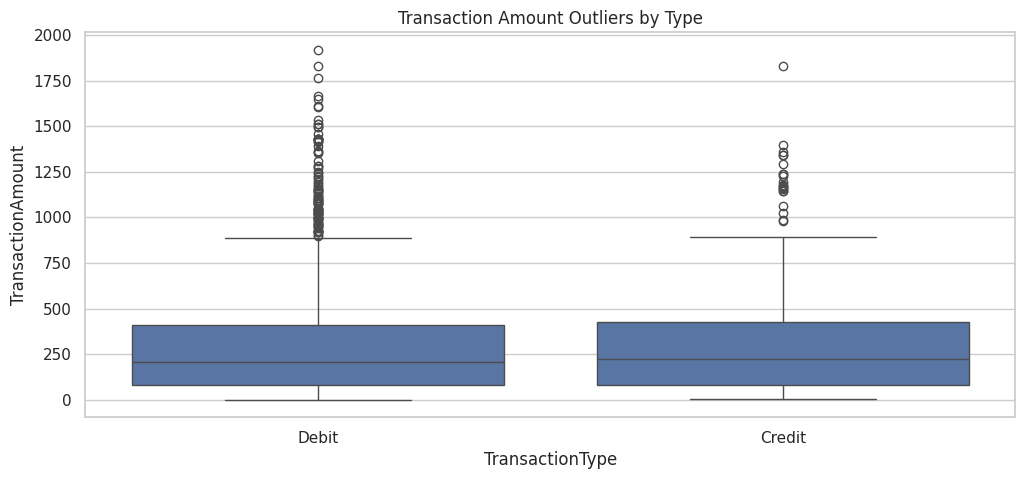

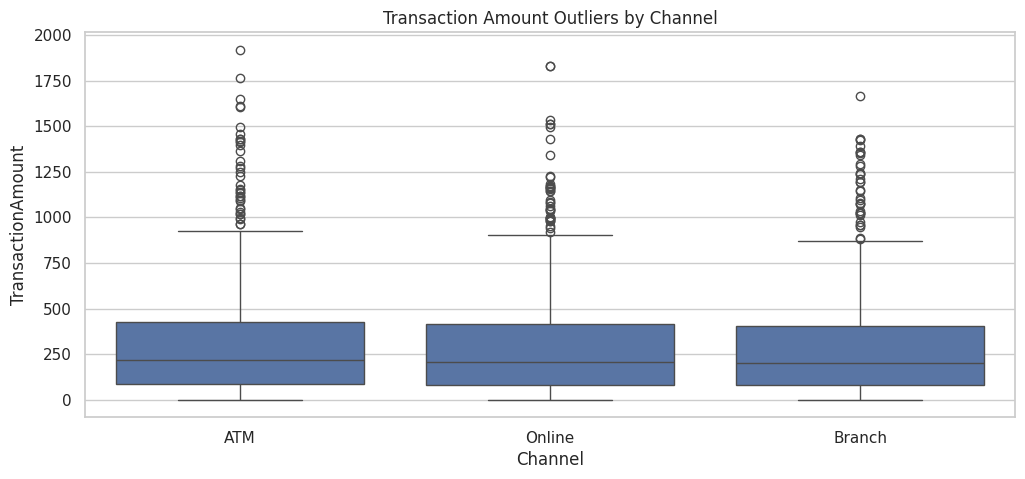

In [16]:
# ----------------------------------------
# Outlier Detection Using Boxplots
# ----------------------------------------
plt.figure(figsize=(12,5))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title("Transaction Amount Outliers by Type")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title("Transaction Amount Outliers by Channel")
plt.show()


In [21]:
# ----------------------------------------
# Fraud Scoring System Based on Multiple Rules
# ----------------------------------------

# 1. Compute additional features needed for rules
# Amount deviation from user's average
df['AvgAmountPerAccount'] = df.groupby('AccountID')['TransactionAmount'].transform('mean')
df['StdAmountPerAccount'] = df.groupby('AccountID')['TransactionAmount'].transform('std').fillna(0.01)
df['AmountDeviationFromAvg'] = np.abs(df['TransactionAmount'] - df['AvgAmountPerAccount'])

# Transaction hour
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Weekend flag
df['IsWeekend'] = df['TransactionDate'].dt.dayofweek.apply(lambda x: 1 if x>=5 else 0)

# Night time flag
df['IsNightTime'] = df['TransactionHour'].apply(lambda x: 1 if 2 <= x <= 5 else 0)

# Initialize fraud score
fraud_score = pd.Series(0, index=df.index)

# ----------------------------
# Rule 1: High transaction amount (top 2%)
high_amount_threshold = df['TransactionAmount'].quantile(0.98)
fraud_score += (df['TransactionAmount'] > high_amount_threshold).astype(int) * 2

# Rule 2: Amount deviates from user's normal behavior
fraud_score += (df['AmountDeviationFromAvg'] > 3 * df['StdAmountPerAccount']).astype(int) * 2

# Rule 3: Multiple login attempts (>=3)
fraud_score += (df['LoginAttempts'] >= 3).astype(int) * 2

# Rule 4: Amount exceeds account balance
df['AmountOverBalance'] = df['TransactionAmount'] - df['AccountBalance']
fraud_score += (df['AmountOverBalance'] > 0).astype(int) * 2

# Rule 5: Very short transaction duration (automated)
short_duration_threshold = df['TransactionDuration'].quantile(0.02)
fraud_score += (df['TransactionDuration'] < short_duration_threshold).astype(int)

# Rule 6: Night-time transactions (2 AM - 5 AM)
fraud_score += ((df['TransactionHour'] >= 2) & (df['TransactionHour'] <= 5)).astype(int)

# Rule 7: Rapid-fire transactions (< 1 min since last transaction)
df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / (60*60*24)
fraud_score += (df['DaysSinceLastTransaction'] < 0.001).astype(int) * 2

# Rule 8: High transaction frequency per account
high_freq_threshold = df['TransactionCountPerAccount'].quantile(0.95)
fraud_score += (df['TransactionCountPerAccount'] > high_freq_threshold).astype(int)

# Rule 9: Very long transaction duration
long_duration_threshold = df['TransactionDuration'].quantile(0.98)
fraud_score += (df['TransactionDuration'] > long_duration_threshold).astype(int)

# Rule 10: Weekend + Night combination
fraud_score += ((df['IsWeekend'] == 1) & (df['IsNightTime'] == 1)).astype(int)

# ----------------------------
# Create Fraud Label based on fraud score threshold
# You can adjust threshold (example: 3 or more)
df['FraudLabel'] = np.where(fraud_score >= 3, 1, 0)

# Check distribution
print(df['FraudLabel'].value_counts())

# Preview
df[['TransactionID','TransactionAmount','LoginAttempts','TransactionHour','FraudLabel']].head()


FraudLabel
0    2098
1     414
Name: count, dtype: int64


,TransactionID,TransactionAmount,LoginAttempts,TransactionHour,FraudLabel
0,TX000001,14.09,1,16,0
1,TX000002,376.24,1,16,0
2,TX000003,126.29,1,18,0
3,TX000004,184.50,1,16,0
4,TX000005,13.45,1,17,0


In [23]:
# ----------------------------------------
# Prepare Features and Target for Random Forest
# ----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Features to use
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts',
            'AccountBalance', 'CustomerAge', 'TransactionCountPerAccount',
            'AmountOverBalance', 'DaysSinceLastTransaction', 'TransactionType',
            'Channel', 'CustomerOccupation']

X = df[features]
y = df['FraudLabel']  # Use the new rule-based fraud label

# Encode categorical columns
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numeric features
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts',
                'AccountBalance', 'CustomerAge', 'TransactionCountPerAccount',
                'AmountOverBalance', 'DaysSinceLastTransaction']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
# ----------------------------------------
# Train Random Forest Classifier
# ----------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       420
           1       1.00      1.00      1.00        83

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Confusion Matrix:
 [[420   0]
 [  0  83]]
ROC AUC Score: 0.9999999999999999


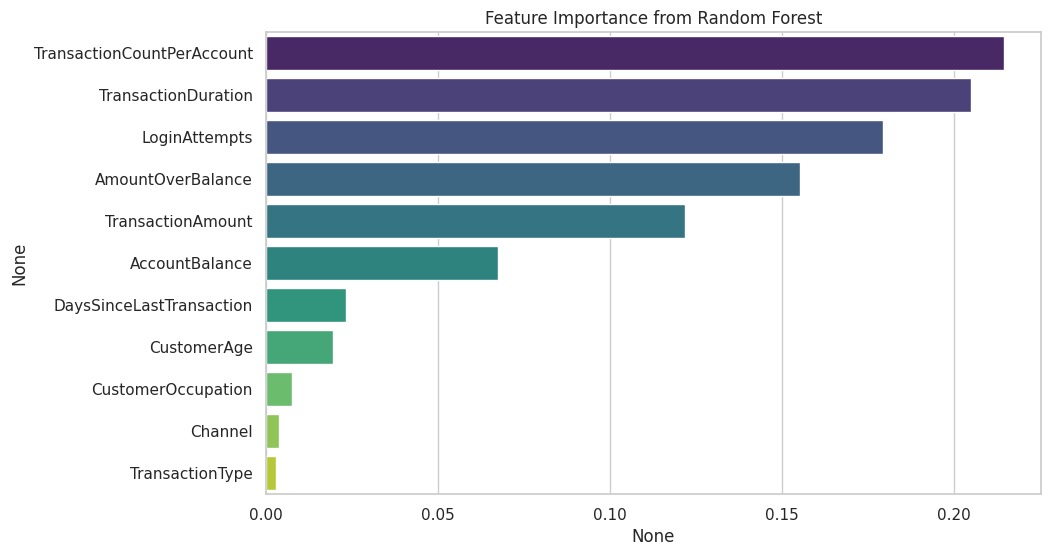

In [25]:
# ----------------------------------------
# Feature Importance Visualization
# ----------------------------------------
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()


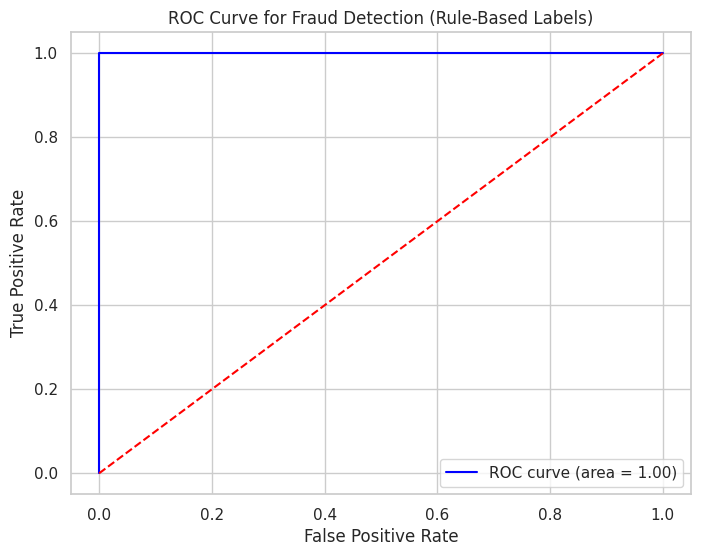

In [27]:
# ----------------------------------------
# ROC Curve Visualization for Rule-Based Fraud
# ----------------------------------------
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test and y_prob are from Random Forest trained on FraudLabel
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection (Rule-Based Labels)')
plt.legend(loc="lower right")
plt.show()


Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       420
           1       0.80      0.14      0.24        83

    accuracy                           0.85       503
   macro avg       0.83      0.57      0.58       503
weighted avg       0.85      0.85      0.81       503

Confusion Matrix:
 [[417   3]
 [ 71  12]]


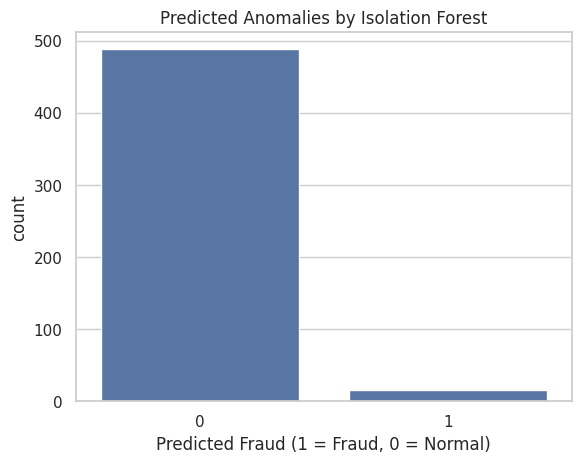

In [28]:
# ----------------------------------------
# Isolation Forest for Anomaly Detection using Rule-Based FraudLabel
# ----------------------------------------
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% fraud assumption
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_iso_pred = iso_forest.predict(X_test)
y_iso_pred = np.where(y_iso_pred == -1, 1, 0)  # Convert -1 -> 1 (fraud), 1 -> 0 (normal)

# Evaluation against FraudLabel
print("Isolation Forest Classification Report:\n", classification_report(y_test, y_iso_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_iso_pred))

# Optional: visualize number of predicted anomalies
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_iso_pred)
plt.title("Predicted Anomalies by Isolation Forest")
plt.xlabel("Predicted Fraud (1 = Fraud, 0 = Normal)")
plt.show()


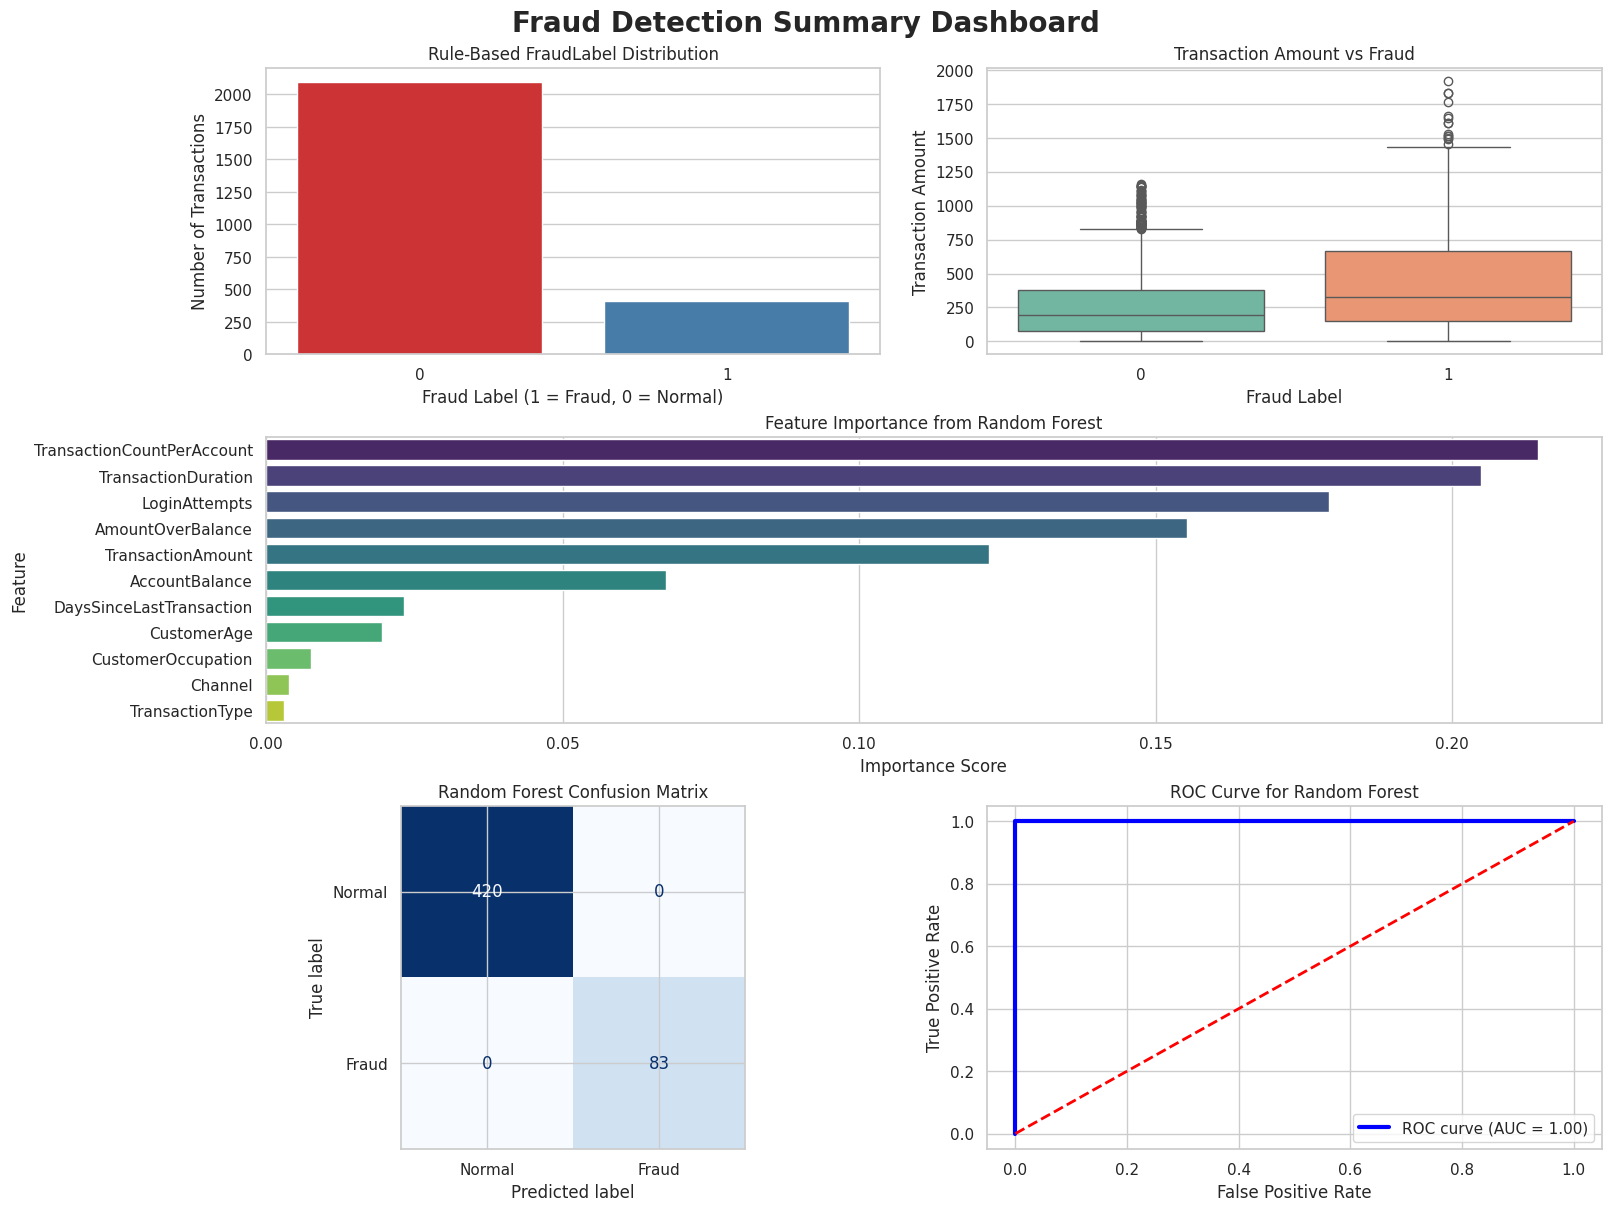

In [29]:
# ----------------------------------------
# Fraud Detection Summary Dashboard
# ----------------------------------------
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set style
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (16,12)

# Create GridSpec layout
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1.2])

# ----------------------------------------
# Plot 1: FraudLabel Distribution
ax0 = fig.add_subplot(gs[0, 0])
sns.countplot(x=df['FraudLabel'], palette='Set1', ax=ax0)
ax0.set_title("Rule-Based FraudLabel Distribution")
ax0.set_xlabel("Fraud Label (1 = Fraud, 0 = Normal)")
ax0.set_ylabel("Number of Transactions")

# ----------------------------------------
# Plot 2: Transaction Amount vs Fraud
ax1 = fig.add_subplot(gs[0, 1])
sns.boxplot(x='FraudLabel', y='TransactionAmount', data=df, palette='Set2', ax=ax1)
ax1.set_title("Transaction Amount vs Fraud")
ax1.set_xlabel("Fraud Label")
ax1.set_ylabel("Transaction Amount")

# ----------------------------------------
# Plot 3: Feature Importance from Random Forest
ax2 = fig.add_subplot(gs[1, :])
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis', ax=ax2)
ax2.set_title("Feature Importance from Random Forest")
ax2.set_xlabel("Importance Score")
ax2.set_ylabel("Feature")

# ----------------------------------------
# Plot 4: Confusion Matrix
ax3 = fig.add_subplot(gs[2, 0])
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Fraud'])
disp.plot(cmap='Blues', ax=ax3, colorbar=False)
ax3.set_title("Random Forest Confusion Matrix")

# ----------------------------------------
# Plot 5: ROC Curve
ax4 = fig.add_subplot(gs[2, 1])
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
ax4.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=3)
ax4.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
ax4.set_title("ROC Curve for Random Forest")
ax4.set_xlabel("False Positive Rate")
ax4.set_ylabel("True Positive Rate")
ax4.legend(loc="lower right")

plt.suptitle("Fraud Detection Summary Dashboard", fontsize=20, fontweight='bold')
plt.show()
